# Analysis
> Module for repeatedly calculating ACM and PACM and corresponding eigenvalues

In [ ]:
#| default_exp analysis

In [ ]:
#| export
#| hide
import pandas as pd
import numpy as np
import matplotlib.cm as cm
import matplotlib.pyplot as plt
from dPCA.lag import *
from dPCA.corrmat import *
from dPCA.TEP import *

In [ ]:
TEP = GetTEP(); TEP.head()

Name,A Feed,D Feed,E Feed,A and C feed,Recycle flow,Reactor feed rate,Reactor pressure,Reactor level,Reactor temperature,Purge rate,...,A feed flow,A and C feed flow,Compressor recycle valve,Purge valve,Separator pot liquid flow,Stripper liquid product flow,Stripper steam valve,Reactor cooling water flow,Condenser cooling water flow,Agitator speed
0,0.24889,3702.3,4502.7,9.4170,26.996,42.183,2705.2,75.173,120.40,0.33611,...,54.059,24.804,63.269,21.950,40.188,39.461,47.000,47.594,41.384,18.905
1,0.24904,3666.2,4526.0,9.2682,26.710,42.332,2705.5,74.411,120.41,0.33676,...,53.781,24.790,62.171,22.239,40.108,43.710,46.128,47.508,41.658,18.976
2,0.25034,3673.3,4501.3,9.4212,26.842,42.360,2705.3,75.125,120.41,0.33739,...,54.075,24.669,61.585,22.191,40.030,39.480,44.121,47.612,41.721,16.562
3,0.25109,3657.8,4497.8,9.3792,26.528,41.982,2707.3,73.992,120.38,0.33664,...,54.117,24.595,61.561,21.959,40.121,32.848,45.858,47.459,40.836,20.094
4,0.24563,3698.0,4537.4,9.3746,26.736,42.354,2705.3,75.283,120.42,0.32521,...,53.906,24.451,61.388,22.271,39.538,36.682,45.753,47.458,41.727,18.330


In [ ]:
#| export
def ACM_analysis(X: pd.DataFrame, # Raw data to perform analysis on
                lag: int # Number of lags to investigate
                )-> dict: # Dict with eigenvalues
    
    res_dict = {}
    
    for i in range(lag+1):
        eigenValues, eigenVectors = np.linalg.eig(ACM(X,i))
        idx_abs = abs(eigenValues).argsort()[::-1]
        eigenValues = abs(eigenValues)[idx_abs]
        eigenVectors = np.real(eigenVectors)[idx_abs]
        res_dict['EigenValues',i] = eigenValues
        res_dict['EigenVectors',i] = eigenVectors
    return res_dict


In [ ]:
#| export
def PACM_analysis(X: pd.DataFrame, # Raw data to perform analysis on
                lag: int # Number of lags to investigate
                )-> dict: # Dict with eigenvalues
    res_dict = {}
    for i in range(lag+1):
        eigenValues, eigenVectors = np.linalg.eig(PACM(X,i))
        idx_abs = abs(eigenValues).argsort()[::-1]
        eigenValues = abs(eigenValues)[idx_abs]
        eigenVectors = np.real(eigenVectors)[idx_abs]
        res_dict['EigenValues', i] = eigenValues
        res_dict['EigenVectors', i] = eigenVectors
    return res_dict

In [ ]:
#| export
class Analysis:
    def __init__(self, X, lag):
        self.X = X
        self.lag = lag
        self.imposter = imposter_matrix(X)
        self.PACM = PACM_analysis(X, lag)
        self.PACM_imposter = PACM_analysis(self.imposter,lag)
        self.ACM = ACM_analysis(X, lag)
        self.ACM_imposter = ACM_analysis(self.imposter, lag)
    
    def show_plots(self):
        
        fig, axs = plt.subplots(1,2, figsize = (10,5))
        
        for i in range(self.lag+1):
            axs[0].scatter(i, self.ACM['EigenValues',i][0], c = 'blue')
            axs[0].scatter(i, self.ACM_imposter['EigenValues',i][0], c = 'red', marker = 'x')
            axs[0].set_title('Autocorrelation Matrix Eigenvalues', fontweight = 'bold')
            axs[0].set_xlabel('Lag')
            axs[0].set_ylabel('Largest Absolute Eigenvalue')
            axs[0].legend(['Data','Imposter'])
            
            axs[1].scatter(i, self.PACM['EigenValues',i][0], c = 'blue')
            axs[1].scatter(i, self.PACM_imposter['EigenValues',i][0], c = 'red', marker = 'x')
            axs[1].set_title('Partial Autocorrelation Matrix Eigenvalues', fontweight = 'bold')
            axs[1].set_xlabel('Lag')
            axs[1].set_ylabel('Largest Absolute Eigenvalue')
            axs[1].legend(['Data','Imposter'])

        

In [ ]:
test = Analysis(TEP,15)

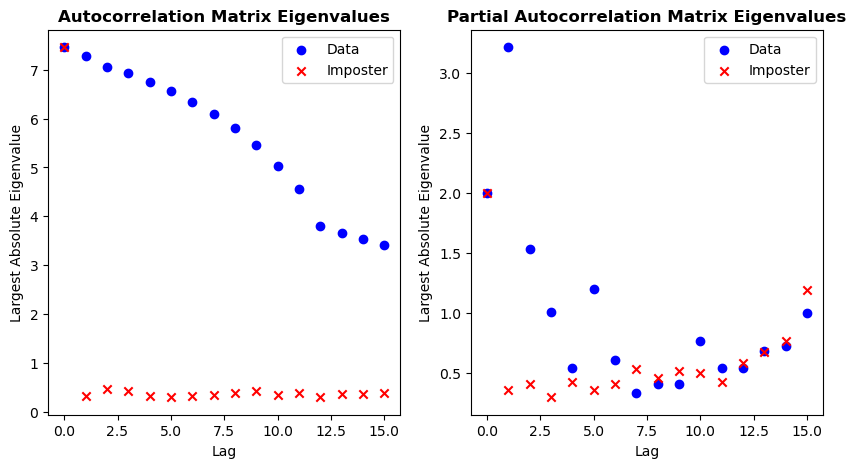

In [ ]:
test.show_plots()

To check the eigenvalues for a given pair we can simply access the matrix and display the first eigenvector which has been sorted to correspond to the largest eigenvalue:

In [ ]:
test.PACM['EigenVectors',15][0]

array([-3.53665965e-02,  9.91247845e-02,  1.48473068e-01,  1.48473068e-01,
       -7.78141954e-02, -7.78141954e-02, -1.18819213e-01, -1.18819213e-01,
        1.46763021e-01,  1.46763021e-01, -2.72832315e-02, -2.72832315e-02,
        1.71289600e-02,  1.71289600e-02,  1.24926467e-01,  1.24926467e-01,
       -1.61051399e-01, -1.61051399e-01, -2.85690998e-01, -2.85690998e-01,
       -4.29317663e-01,  9.09143716e-02,  1.75729524e-01,  1.75729524e-01,
        3.34182238e-01,  3.34182238e-01, -1.36434720e-01, -1.36434720e-01,
        4.48605229e-01,  4.48605229e-01,  2.58924861e-02,  2.58924861e-02,
        9.55567158e-03,  4.99279556e-02,  4.99279556e-02, -4.30792202e-01,
        4.43065546e-01,  4.43065546e-01,  5.03627719e-01,  5.03627719e-01,
        1.60398868e-01,  1.60398868e-01,  3.08507125e-01,  3.08507125e-01,
        8.13763194e-02,  8.13763194e-02,  4.71123697e-02,  4.71123697e-02,
        4.08169775e-02, -4.87651437e-02,  3.38536505e-04, -2.44402708e-03])

In [ ]:
#| hide
import nbdev; nbdev.nbdev_export()